### Hi guys :)) SO ALL PROJECT RELATED UPLOAD KO NALANG SA GITHUB KO - SEND NIYO SAKIN SA CHAT THEN AKO NALANG MAG COMPILE :)
pag compile ko... lagay ko nalang names niyo para ma reference niyo agad yung codes niyo <br>
**i'll make a new notebook for data wrangling & viz**

#### if may question kayo msg me tnx

eto yun **"clean"** ver ng codes ko. <br>
sorry... para makapag start na tayo.. <br>
i'll upload na din yung for twitter here na codes pag na update ko na... <br>
**Desc ng `.csv` files sa bottom**

-pat <3

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import time
import pandas as pd

In [ ]:
base_url = 'https://reelgood.com'

def get_show_link_and_loadmore(page_url):
    links = []
    tv_page = requests.get(page_url)
    parsed = bs(tv_page.text, 'html.parser')
    itemprop = parsed.find_all(itemprop="itemListElement")
    for items in itemprop:
        url = base_url + items.a['href']
        links.append(url)
    try:
        load_more = parsed.find(class_="css-ytumd6")['href']
    except:
        load_more = None
    return (links, load_more)

res = get_show_link_and_loadmore('https://reelgood.com/tv')
show_links = res[0]

while res[1]:
    page_url = base_url + res[1]
    res = get_show_link_and_loadmore(page_url)
    show_links += res[0]
    time.sleep(3)
    print(res[1])

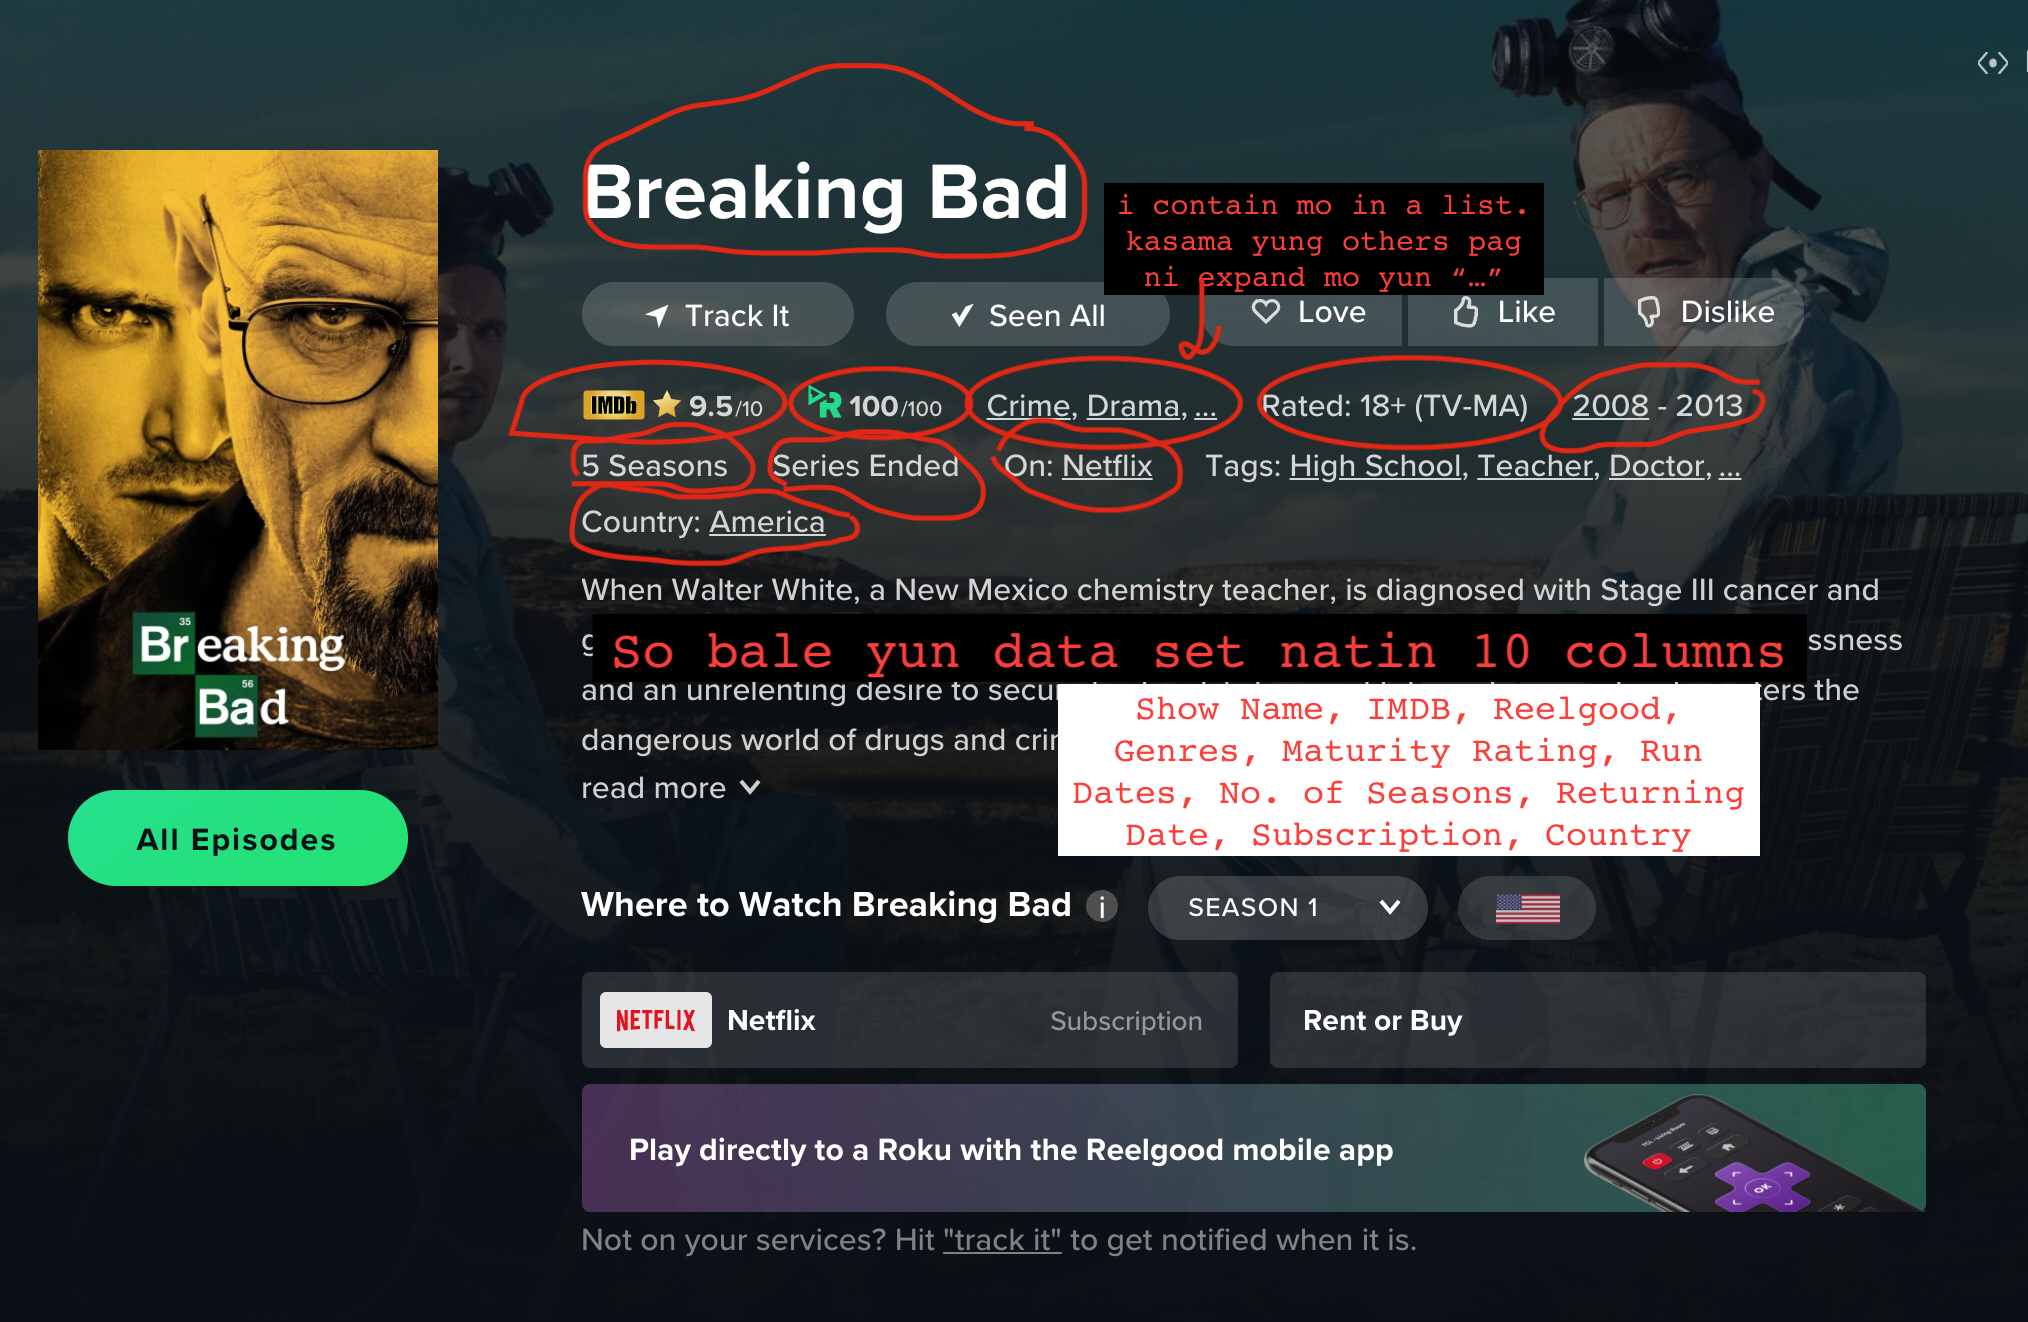

Eto lang sinundan ko :)) sorry sa countries. ayusin nalang natin hahaha

In [ ]:
#show name
def get_show_name(parsed):
    return parsed.find('h1').text

# imdb rating
def get_imdb_rating(parsed):
    try:
        imdb = parsed.find(title="IMDb Rating").text
        return imdb.split('/')[0]
    except:
        None

# reelgood rating
def get_reelgood_rating(parsed):
    try:
        rg = parsed.find(title="Reelgood Rating").text
        return rg.split('/')[0]
    except:
        None

# Genres
def get_genres(parsed):
    try: 
        more_gen = parsed.find(itemprop="genre").parent.parent.text
        all_gen = ['Action & Adventure', 'Animation', 'Anime', 'Children', 'Comedy', 
                   'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Food', 
                   'Game Show','Home & Garden','Horror','LGBTQ', 'Mystery', 'Reality', 
                   'Science-Fiction', 'Sport', 'Stand-up & Talk', 'Travel']
        Genre = []
        for gen in all_gen:
            if gen in more_gen:
                Genre.append(gen)
        return Genre
    except:
        None

# Maturity Rating
def get_maturity_rating(parsed):
    try:
        return parsed.find(itemprop="contentRating").parent.text
    except:
        None

# Running dates
def get_running_dates(parsed):  
    try:
        return parsed.find(itemprop="dateCreated").parent.text
    except:
        None

# Seasons
def get_no_seasons(parsed):
    try:
        return parsed.find(itemprop="numberOfSeasons").parent.text
    except:
        None

# Returning Dates
def get_returning_dates(parsed):
    try:
        return parsed.find(itemprop="numberOfSeasons").parent.next_sibling.text
    except:
        None

# Streaming Service - Di ko na ni list yung for cable
def get_streaming_service(parsed):
    try:
        stream = parsed.find(string = 'On: ').parent.text
        services = ['Netflix', 'Hulu', 'Prime Video', 'Disney+', 'HBO', 'HBO MAX', 
                    'Peacock', 'Apple TV+', 'fuboTV', 'Showtime', 'Starz', 
                    'CBS All Access','Epix', 'Crunchyroll', 'Funimation', 'AMC Premiere', 
                    'Kanopy', 'Hoopla', 'The Criterion Channel', 'BritBox', 'DC Universe', 
                    'Mubi', 'Cinemax', 'Fandor', 'AcornTV', 'Hallmark Movies Now', 'BET+', 
                    'Youtube Premium','IndieFlix']
        sub_list = []
        for service in services:
            if service in stream:
                sub_list.append(service)
        return sub_list
    except:
        None

# Country - Sorry tinamad na akong ayusin.. bukas nalang
def get_country(parsed):
    try:
        return parsed.find(string  = 'Country:').parent.text
    except:
        None

show_data = []
for show in show_links:
    tv_show = requests.get(show)
    soup = bs(tv_show.text, 'html.parser')
        
    show_name = get_show_name(soup)
    imdb_rating = get_imdb_rating(soup)
    reelgood_rating = get_reelgood_rating(soup)
    genres = get_genres(soup)
    maturity_rating = get_maturity_rating(soup)
    running_date = get_running_dates(soup)
    seasons = get_no_seasons(soup)
    returning = get_returning_dates(soup)
    service = get_streaming_service(soup)
    country = get_country(soup)
    
    show_data += [[show_name, imdb_rating, reelgood_rating, 
                   genres, maturity_rating, running_date, seasons, 
                   returning, service, country]]
    time.sleep(1)
    print(show_name)

In [ ]:
df = pd.DataFrame(data = show_data)
df.columns = ['ShowName', 'Imdb', 'Reelgood', 'Genres',  'MaturityRating', 'RunningDate', 'Seasons', 'ReturningDate', 'Service', 'Country' ]
display(df.head())

# df.to_csv('scrape.csv', index=False)

#### Also may mga nag [504]('https://httpstatuses.com/504') and [502]('https://httpstatuses.com/502') ako tho onti lang naman so hindi alam if na scrape yun data.

bale 2 yun csv file.

- `all_data.csv` - scraped data merged with show_links.
    - scraped data per ~1k/4k entries (ni slice ko kasi ang dami)
    - ni concat ko all `.csv` files
    - ni merge ko yun `show_links` kaya may `Links` column
    - replaced empty lists `[]` with `None`


- `all_subscription_data.csv` - ni keep ko lang yung NOT NaN sa Subscription.
    - dropped rows na may `NaN` sa `Subscription`

yun 3rd yung `all_show_links.csv` lang -  ist ng show_lists lol <br>
`combined_csv.csv` is yung raw na concat lang

In [ ]:
# combining scraped data into
files = glob.glob('upto*.csv')
combined_csv = pd.concat([pd.read_csv(f) for f in files ])
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

# all_data.csv
mergeddf = pd.merge(show_links ,scraped_data, on=['ShowName'], how='left')
mergeddf = mergeddf.replace(to_replace =["[]"], value =None) 
mergeddf = mergeddf.drop_duplicates()
mergeddf.to_csv('all_data.csv',index=False)

In [ ]:
# all_subscription_data.csv
mergeddf_service = mergeddf[mergeddf['Service'].notna()]
mergeddf_service